In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import os
plt.rcParams['axes.grid'] = True # Turns grid lines on globally

In [2]:
path = os.getcwd()
files = os.listdir()
print(files)
data = pd.read_csv(path+'/'+'Lab9_mod_intial.csv',header = 0)
files

['Lab9_report_raw.csv', 'Figure5-4.png', 'Lab9_analysis.ipynb', '.~lock.Experimental_Table_Report.xlsx#', '.~lock.Expected_Table_Report.xlsx#', '.ipynb_checkpoints', 'Figure5-2.png', 'Figure5-1.png', 'Analysis_Table.xlsx', 'Analysis_Table_Report.xlsx', 'Experimental_Table_Report.xlsx', '.~lock.Analysis_Table.xlsx#', 'Expected_Table_Report.xlsx', 'Figure5-3.png', 'Lab9_raw.csv', 'Lab9_mod_intial.csv']


['Lab9_report_raw.csv',
 'Figure5-4.png',
 'Lab9_analysis.ipynb',
 '.~lock.Experimental_Table_Report.xlsx#',
 '.~lock.Expected_Table_Report.xlsx#',
 '.ipynb_checkpoints',
 'Figure5-2.png',
 'Figure5-1.png',
 'Analysis_Table.xlsx',
 'Analysis_Table_Report.xlsx',
 'Experimental_Table_Report.xlsx',
 '.~lock.Analysis_Table.xlsx#',
 'Expected_Table_Report.xlsx',
 'Figure5-3.png',
 'Lab9_raw.csv',
 'Lab9_mod_intial.csv']

In [3]:
for i in range(4,12):
    data.loc[i,"DMM2"] /= 1000.
for j in range(len(data)):
    data.loc[j,"ratio"] = data.loc[j,"DMM2"]/data.loc[j,"DMM1"]

In [4]:
data.columns

Index(['FGOV', 'DMM1', 'DMM2', 'micPos', 'PP', 'Frequency ', 'Vzero', 'Pzero',
       'K[data sheet]', 'ratio'],
      dtype='object')

In [5]:
data

,FGOV,DMM1,DMM2,micPos,PP,Frequency,Vzero,Pzero,K[data sheet],ratio
0,2.88,5.00,1.9270,0.00,7.5,5.0,0.0,7.06,NaN,0.385400
1,NaN,5.00,1.6590,1.00,NaN,NaN,NaN,NaN,NaN,0.331800
2,NaN,5.01,1.3850,2.00,NaN,NaN,NaN,NaN,NaN,0.276447
3,NaN,5.01,1.1100,3.00,NaN,NaN,NaN,NaN,NaN,0.221557
4,NaN,5.01,0.8094,4.00,NaN,NaN,NaN,NaN,NaN,0.161557
5,NaN,5.01,0.5509,5.00,NaN,NaN,NaN,NaN,NaN,0.109960
6,NaN,5.01,0.2929,6.00,NaN,NaN,NaN,NaN,NaN,0.058463
7,NaN,5.01,0.0225,7.00,NaN,NaN,NaN,NaN,NaN,0.004491
8,NaN,5.01,0.0000,7.06,NaN,NaN,NaN,NaN,NaN,0.000000
9,NaN,5.01,0.2317,8.00,NaN,NaN,NaN,NaN,NaN,0.046248


In [6]:
# Data Sheet Values
#pd.set_option('precision', 3)
Range = 12.5 # [mm]
SS = 0.7 # [V/V]
K = SS/Range # [V/V/mm]
print(K)

for i in range(len(data)):
    
    data.loc[i,'LVDT_pos'] = data.loc[i,'micPos'] - 7.06
    if i<8:
        data.loc[i,"expRat"] = -K*data.loc[i,'LVDT_pos']
    else:
        data.loc[i,"expRat"] = K*data.loc[i,'LVDT_pos']
data

0.055999999999999994


,FGOV,DMM1,DMM2,micPos,PP,Frequency,Vzero,Pzero,K[data sheet],ratio,LVDT_pos,expRat
0,2.88,5.00,1.9270,0.00,7.5,5.0,0.0,7.06,NaN,0.385400,-7.06,0.39536
1,NaN,5.00,1.6590,1.00,NaN,NaN,NaN,NaN,NaN,0.331800,-6.06,0.33936
2,NaN,5.01,1.3850,2.00,NaN,NaN,NaN,NaN,NaN,0.276447,-5.06,0.28336
3,NaN,5.01,1.1100,3.00,NaN,NaN,NaN,NaN,NaN,0.221557,-4.06,0.22736
4,NaN,5.01,0.8094,4.00,NaN,NaN,NaN,NaN,NaN,0.161557,-3.06,0.17136
5,NaN,5.01,0.5509,5.00,NaN,NaN,NaN,NaN,NaN,0.109960,-2.06,0.11536
6,NaN,5.01,0.2929,6.00,NaN,NaN,NaN,NaN,NaN,0.058463,-1.06,0.05936
7,NaN,5.01,0.0225,7.00,NaN,NaN,NaN,NaN,NaN,0.004491,-0.06,0.00336
8,NaN,5.01,0.0000,7.06,NaN,NaN,NaN,NaN,NaN,0.000000,0.00,0.00000
9,NaN,5.01,0.2317,8.00,NaN,NaN,NaN,NaN,NaN,0.046248,0.94,0.05264


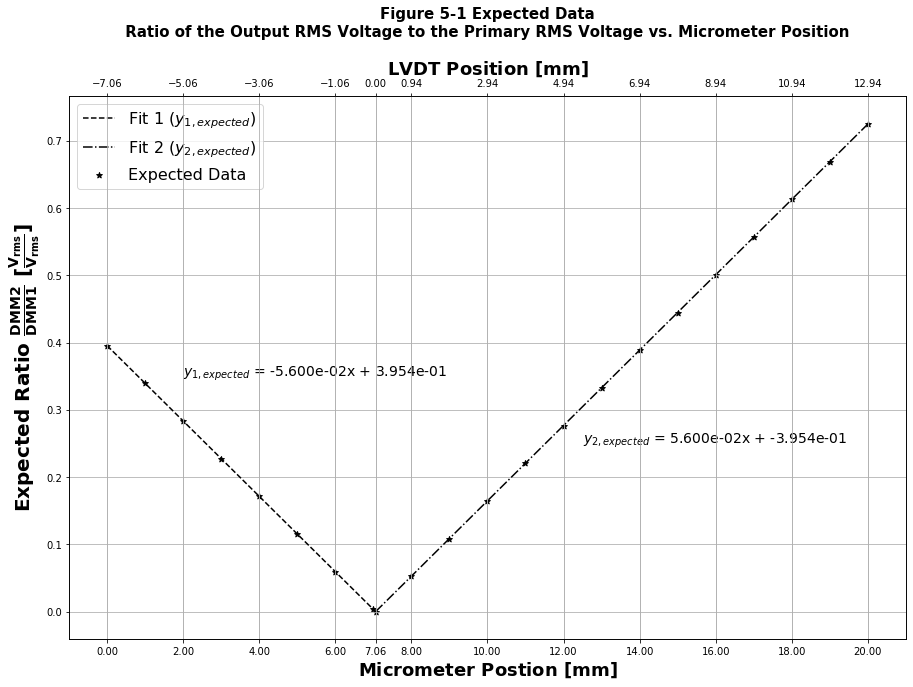

In [27]:
# Plot with fit for Expected Data
fig1,ax = plt.subplots(figsize = [15,10])
x = data.micPos
fudge = -0.3953599999999999-5.5511151231257827e-17
#fudge = 0.0
for i in range(len(data)):
    if i <= 8:
        data.loc[i,'Yexp'] = np.double(-K*data.loc[i,'micPos']-fudge)
    else:
        data.loc[i,'Yexp'] = np.double(K*data.loc[i,'micPos']+fudge)

    
ax.scatter(data.micPos,data.Yexp,color = 'black',marker = '*')
#ax.scatter(data.micPos,data.ratio,color = 'red',marker = '.',s = 70)
ax.set_xlabel(r'$\bf Micrometer \ Postion \ [mm]$',fontsize = 18)
ax.set_ylabel(r'$\bf Expected \ Ratio \ \frac {DMM2}{DMM1} \ [\frac{V_{rms}}{V_{rms}}]$',fontsize=20)
p1 = np.polyfit(data.micPos[0:9],data.Yexp[0:9],1)
fit1 = np.polyval(p1,data.micPos[0:9])
ax.plot(data.micPos[0:9],fit1,linestyle = '--',color = 'black')
p2 = np.polyfit(data.micPos[8:22],data.Yexp[8:22],1)
fit2 = np.polyval(p2,data.micPos[8:22])
ax.plot(data.micPos[8:22],fit2,linestyle = '-.',color = 'black')
ax.set_title('Figure 5-1 Expected Data\n Ratio of the Output RMS Voltage' \
             +' to the Primary RMS Voltage vs. Micrometer Position \n',fontsize = 15,fontweight='bold')
txt1 = '$y_{1,expected}$ = %.3ex'%p1[0]+' + %.3e'%p1[1]
ax.text(2,.35,txt1,fontsize = 14)
txt1 = '$y_{2,expected}$ = %.3ex'%p2[0]+' + %.3e'%p2[1]
ax.text(12.5,.25,txt1,fontsize = 14)
plotList = ['Fit 1 ($y_{1,expected}$)','Fit 2 ($y_{2,expected}$)','Expected Data','Experimental Data']

#ax.set_xticklabels(data.micPos)
ax2 = ax.twiny()
ax2.scatter(data.LVDT_pos,data.expRat,alpha=0)
ax.set_xticks([0,2,4,6,7.06,8,10,12,14,16,18,20])
ax2.set_xticks([-7.06,-5.06,-3.06,-1.06,0.,.94,2.94,4.94,6.94,8.94,10.94,12.94])
ax2.set_xlabel(r'$\bf LVDT \ Position \ [mm]$',fontsize = 18)
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
#fig1.subplots_adjust(top=0.85)
fig1.savefig('Figure5-1.png', bbox_inches="tight")


In [8]:
for i in range(len(data)):
    
    data.loc[i,'LVDT_pos'] = data.loc[i,'micPos'] - 7.06
    if i<8:
        data.loc[i,"expRat"] = -K*data.loc[i,'LVDT_pos']
    else:
        data.loc[i,"expRat"] = K*data.loc[i,'LVDT_pos']
data

,FGOV,DMM1,DMM2,micPos,PP,Frequency,Vzero,Pzero,K[data sheet],ratio,LVDT_pos,expRat,Yexp
0,2.88,5.00,1.9270,0.00,7.5,5.0,0.0,7.06,NaN,0.385400,-7.06,0.39536,0.39536
1,NaN,5.00,1.6590,1.00,NaN,NaN,NaN,NaN,NaN,0.331800,-6.06,0.33936,0.33936
2,NaN,5.01,1.3850,2.00,NaN,NaN,NaN,NaN,NaN,0.276447,-5.06,0.28336,0.28336
3,NaN,5.01,1.1100,3.00,NaN,NaN,NaN,NaN,NaN,0.221557,-4.06,0.22736,0.22736
4,NaN,5.01,0.8094,4.00,NaN,NaN,NaN,NaN,NaN,0.161557,-3.06,0.17136,0.17136
5,NaN,5.01,0.5509,5.00,NaN,NaN,NaN,NaN,NaN,0.109960,-2.06,0.11536,0.11536
6,NaN,5.01,0.2929,6.00,NaN,NaN,NaN,NaN,NaN,0.058463,-1.06,0.05936,0.05936
7,NaN,5.01,0.0225,7.00,NaN,NaN,NaN,NaN,NaN,0.004491,-0.06,0.00336,0.00336
8,NaN,5.01,0.0000,7.06,NaN,NaN,NaN,NaN,NaN,0.000000,0.00,0.00000,0.00000
9,NaN,5.01,0.2317,8.00,NaN,NaN,NaN,NaN,NaN,0.046248,0.94,0.05264,0.05264


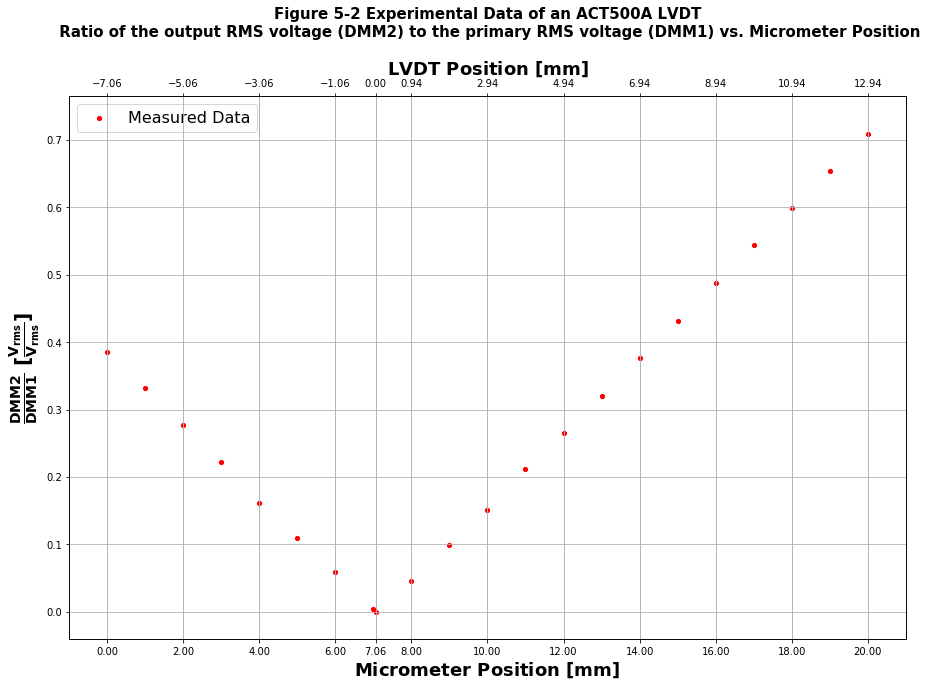

In [26]:
fig2,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.micPos,data.ratio,color = 'red',marker = '.',s=70)
ax.set_xlabel(r'$\bf Micrometer \ Position \ [mm]$',fontsize = 18)
ax.set_ylabel(r'$\bf \frac {DMM2}{DMM1} \ [ \frac{V_{rms}}{V_{rms}}]$',fontsize = 20)
plotList = ['Measured Data']
ax2 = ax.twiny()
ax2.scatter(data.LVDT_pos,data.expRat,alpha = 0,marker=None)
ax.set_xticks([0,2,4,6,7.06,8,10,12,14,16,18,20])
ax2.set_xticks([-7.06,-5.06,-3.06,-1.06,0.,.94,2.94,4.94,6.94,8.94,10.94,12.94])
ax2.set_xlabel(r'$\bf LVDT \ Position \ [mm]$',fontsize = 18)
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
ax.set_title('Figure 5-2 Experimental Data of an ACT500A LVDT\n Ratio of the output RMS voltage (DMM2)' \
             +' to the primary RMS voltage (DMM1) vs. Micrometer Position\n ',fontsize = 15,fontweight='bold')
fig2.savefig('Figure5-2.png', bbox_inches="tight")

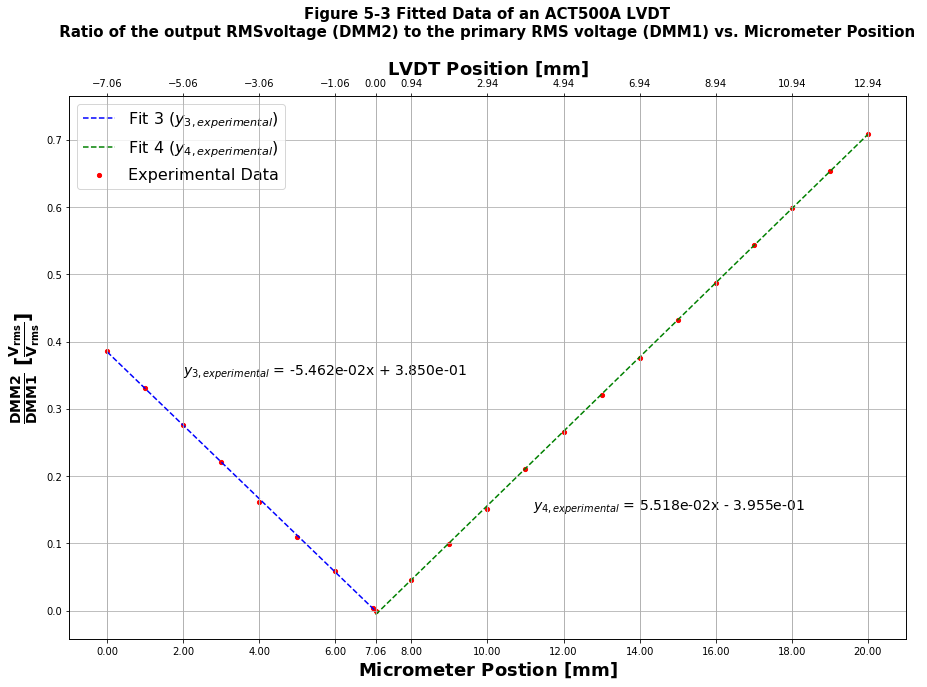

In [25]:
fig3,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.micPos,data.ratio,color = 'red',marker = '.',s=70)
ax.set_xlabel(r'$\bf Micrometer \ Postion \ [mm]$',fontsize = 18)
ax.set_ylabel(r'$\bf \frac {DMM2}{DMM1} \ [\frac{V_{rms}}{V_{rms}}]$',fontsize=20)
p1 = np.polyfit(data.micPos[0:9],data.ratio[0:9],1)
fit1 = np.polyval(p1,data.micPos[0:9])
ax.plot(data.micPos[0:9],fit1,linestyle = '--',color = 'blue')
p2 = np.polyfit(data.micPos[8:22],data.ratio[8:22],1)
fit2 = np.polyval(p2,data.micPos[8:22])
ax.plot(data.micPos[8:22],fit2,linestyle = '--',color = 'green')
ax.set_title('Figure 5-3 Fitted Data of an ACT500A LVDT\n Ratio of the output RMS' \
             +'voltage (DMM2) to the primary RMS voltage (DMM1) vs. Micrometer Position \n',fontsize = 15,fontweight='bold')
txt1 = '$y_{3,experimental}$ = %.3ex'%p1[0]+' + %.3e'%p1[1]
ax.text(2,.35,txt1,fontsize = 14)
txt2 = '$y_{4,experimental}$ = %.3ex'%p2[0]+' - %.3e'%abs(p2[1])
ax.text(11.2,.15,txt2,fontsize = 14)
plotList = ['Fit 3 ($y_{3,experimental}$)','Fit 4 ($y_{4,experimental}$)','Experimental Data']
ax2 = ax.twiny()
ax2.scatter(data.LVDT_pos,data.expRat,alpha = 0,marker=None)
ax.set_xticks([0,2,4,6,7.06,8,10,12,14,16,18,20])
ax2.set_xticks([-7.06,-5.06,-3.06,-1.06,0.,.94,2.94,4.94,6.94,8.94,10.94,12.94])
ax2.set_xlabel(r'$\bf LVDT \ Position \ [mm]$',fontsize = 18)
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
fig3.savefig('Figure5-3.png', bbox_inches="tight")

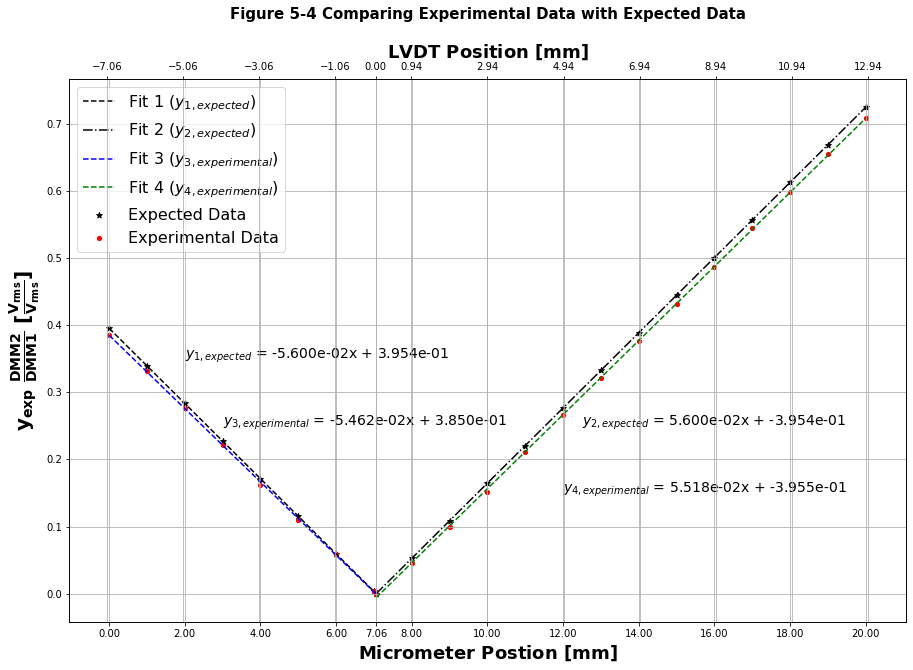

In [24]:
# Plot with fit for Expected Data
fig4,ax = plt.subplots(figsize = [15,10])
    
ax.scatter(data.micPos,data.Yexp,color = 'black',marker = '*')
ax.scatter(data.micPos,data.ratio,color = 'red',marker = '.',s = 70)
ax.set_xlabel(r'$\bf Micrometer \ Postion \ [mm]$',fontsize = 18)
ax.set_ylabel(r'$\bf y_{exp} \ \frac {DMM2}{DMM1} \ [\frac{V_{rms}}{V_{rms}}]$',fontsize=20)
p1 = np.polyfit(data.micPos[0:9],data.Yexp[0:9],1)
expFit1 = np.polyval(p1,data.micPos[0:9])
ax.plot(data.micPos[0:9],expFit1,linestyle = '--',color = 'black')
p2 = np.polyfit(data.micPos[8:22],data.Yexp[8:22],1)
expFit2 = np.polyval(p2,data.micPos[8:22])
ax.plot(data.micPos[8:22],expFit2,linestyle = '-.',color = 'black')
p3 = np.polyfit(data.micPos[0:9],data.ratio[0:9],1)
fit3 = np.polyval(p3,data.micPos[0:9])
ax.plot(data.micPos[0:9],fit3,linestyle = '--',color = 'blue')
p4 = np.polyfit(data.micPos[8:22],data.ratio[8:22],1)
fit4 = np.polyval(p4,data.micPos[8:22])
ax.plot(data.micPos[8:22],fit4,linestyle = '--',color = 'green')
ax.set_title('Figure 5-4 Comparing Experimental Data with Expected Data\n',fontsize = 15,fontweight='bold')
txt1 = '$y_{1,expected}$ = %.3ex'%p1[0]+' + %.3e'%p1[1]
ax.text(2,.35,txt1,fontsize = 14)
txt2 = '$y_{2,expected}$ = %.3ex'%p2[0]+' + %.3e'%p2[1]
ax.text(12.5,.25,txt2,fontsize = 14)
txt3 = '$y_{3,experimental}$ = %.3ex'%p3[0]+' + %.3e'%p3[1]
ax.text(3,.25,txt3,fontsize = 14)
txt4 = '$y_{4,experimental}$ = %.3ex'%p4[0]+' + %.3e'%p4[1]
ax.text(12,.15,txt4,fontsize = 14)
plotList = ['Fit 1 ($y_{1,expected}$)','Fit 2 ($y_{2,expected}$)','Fit 3 ($y_{3,experimental}$)', \
            'Fit 4 ($y_{4,experimental}$)','Expected Data','Experimental Data']
ax2 = ax.twiny()
ax2.scatter(data.LVDT_pos,data.expRat,alpha = 0,marker=None)
ax.set_xticks([0,2,4,6,7.06,8,10,12,14,16,18,20])
ax2.set_xticks([-7.06,-5.06,-3.06,-1.06,0.,.94,2.94,4.94,6.94,8.94,10.94,12.94])
ax2.set_xlabel(r'$\bf LVDT \ Position \ [mm]$',fontsize = 18)
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
fig4.savefig('Figure5-4.png', bbox_inches="tight")

In [12]:

tableData = data.round({'ratio': 4, 'Yexp': 4})
tableData.to_excel("Analysis_Table.xlsx")